## Universidade Federal de Viçosa (UFV) - Campus Viçosa

**Aluno:** Erick Lima Figueiredo **MA:** 98898

**Disciplina:** Estrutura de Dados e Algoritmos

In [ ]:
import sys
from copy import deepcopy
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sys.setrecursionlimit(15_000)

### $Questão \ 1$

a)
Pseudocódigo do `BinaryHeap`:

```
Principais métodos da estrutura:

int get_top(heap):
  if heap.size() == 0:
    return NULL;
  retun heap[0];

void insert(heap, element):
  heap.push(element);

  idx = heap.size() - 1
  parent_idx = (idx - 1) // 2

  while idx > 0 and heap[parent_idx] > heap[idx]:
    heap[parent_idx], heap[idx] = heap[idx], heap[parent_idx]
    idx = parent_idx
    parent_idx = (idx - 1) // 2

void delete(heap, idx):
  if idx >= heap.size():
    return;

  heap[idx], heap[heap.size() - 1] = heap[heap.size() - 1], heap[idx]
  heap.pop()
  heapify(heap, idx)

void heapify(heap, parent):
  top = parent

  left = 2 * parent + 1
  right = 2 * parent + 2

  if left < heap.size() and criteria(heap[left], heap[top]):
      top = left

  if right < heap.size() and criteria(self._data[right], heap[top]):
      top = right
  
  if top != parent:
      heap[parent], heap[top] = heap[top], heap[parent]
      heapify(heap, top)

void bottom_up_heapify(heap):
  if heap.size() <= 1:
    return;

  idx = heap.size() - 1
  for i in interval((index // 2) to -1 inc -1):
      heapify(i)

```

Ordens de completidade:

```
get_top(heap): theta(1)

insert(heap, element): Relação de Recorrência = T(n/2) + 1 -> Pelo T.M. temos O(log(n))

delete(heap, idx): A principal operação é o heapify, logo temos O(log(n))

heapify(heap, parent): Relação de Recorrência = T(n/2) + 1, pois a cada recursão opta por um ramo da árvore-> Pelo T.M. temos O(log(n))

bottom_up_heapify(heap): n/2 * ((T(n/2))+1), a principal operação é o heapify dentro do loop, logo temos n/2 * ((T(n/2))+1) = n/2 * log(n/2) ->O(nlog(n))
```

Implementação concreta do `BinaryHeap`.

In [ ]:
class BinaryHeap:
  """
  Heap Binário:

  Trata-se de uma árvore binária;
  É completamente preenchida até seu último nível;
  É preenchida de cima para baixo e da esquerda para a direita;

  Max-heap: todo nó é maior que seus filhos;
  Min-heap: todo nó é menor que seus filhos;

  Atenção: Pelo critério padrão aplica-se o MinHeap
  """

  def __init__(self, data: list[any] = [], criteria: callable = (lambda a, b: a < b)) -> None:
    self.__data = deepcopy(data)
    self.__criteria = criteria

    self.__bottom_up_heapify()

  def get_top(self) -> any:
    return self.__data[0] if len(self.__data) > 0 else None

  def get_heap(self) -> list[any]:
    return deepcopy(self.__data)

  def insert(self, value: any) -> None:
    self.__data.append(value)

    index = len(self.__data) - 1
    parent_index = self.__get_parent_by_index(index)

    while index > 0 and self.__criteria(self.__data[index], self.__data[parent_index]):
      self.__data[index], self.__data[parent_index] = self.__data[parent_index], self.__data[index]
      index = parent_index
      parent_index = self.__get_parent_by_index(index)

  def delete(self, index: int) -> None:
    if index >= len(self.__data):
      return None

    self.__data[index] = self.__data[-1]
    del self.__data[-1]
    self.heapify(index)

  def heapify(self, parent: int) -> None:
    top = parent

    l = 2 * parent + 1
    r = 2 * parent + 2

    if l < len(self.__data) and self.__criteria(self.__data[l], self.__data[top]):
      top = l

    if r < len(self.__data) and self.__criteria(self.__data[r], self.__data[top]):
      top = r

    if top != parent:
      self.__data[top], self.__data[parent] = self.__data[parent], self.__data[top]
      self.heapify(top)

  def __bottom_up_heapify(self) -> None:
    if len(self.__data) <= 1: return

    index = len(self.__data) - 1

    # Visitamos todos os nós da árvore que possui filhos
    # O último elemento que possui nós esta na metade da lista
    for i in range(index // 2, -1, -1):
      self.heapify(i)


  def __get_parent_by_index(self, index: int) -> int:
    return (index-1) // 2



Demonstração de uso da estrutura:

In [ ]:
min_heap = BinaryHeap()
max_heap = BinaryHeap(criteria=(lambda a, b: a > b))

In [ ]:
for i in range(10):
  min_heap.insert(10 - i)
  max_heap.insert(i+1)

print('min heap:', min_heap.get_heap())
print('max heap:', max_heap.get_heap())

min heap: [1, 2, 5, 4, 3, 9, 6, 10, 7, 8]
max heap: [10, 9, 6, 7, 8, 2, 5, 1, 4, 3]


b) Implementação de `PriorityQueue` a partir de `BinaryHeap`:

Para a criação da `PriorityQueue`, foi definidida uma relação de herança, onde `PrioriryQueue` herda de `BinaryHeap`. Além disso foram definidos dois métodos, insert e pop, onde o insert apenas chama o insert do pai, enquanto o pop pega o topo, reserva seu valor, remove o elemento e o retorna.

In [ ]:
class PriorityQueue(BinaryHeap):
  def __init__(self, data: list[any] = [], criteria: callable = (lambda a, b: a < b)) -> None:
    super().__init__(data, criteria)

  def pop(self) -> any:
    top = super().get_top()
    super().delete(0)
    return top


Demonstração de uso da estrutura:

In [ ]:
pq = PriorityQueue([i+1 for i in range(10)], criteria = (lambda a, b: a > b))

pq.insert(11)

for i in range(11):
  print(pq.pop(), end=' ')


11 10 9 8 7 6 5 4 3 2 1 

c) Implementação do HeapSort:

Pseudo-código:

```
heapsort(array)
  heap = convertToHeap(array)
  sorted = []

  while heap.size() > 0:
    top = heap[0]
    sorted.push(top)
    heap.remove(0)

  return sorted
```

Análise de complexidade:

```
A principal operação de HeapSort é a remocão de um elemento da Heap (remocão do topo), cujo core é o heapify com complexidade
O(log(n)). A função é chamada n vezes, sendo n o número de elementos da Heap. A complexidade é portanto O(nlog(n)).


```

In [ ]:
def heapsort(data: list[any], criteria: callable = (lambda a, b: a < b)) -> list[any]:
    heap = BinaryHeap(data, criteria)

    sorted_list = []

    while heap.get_top() is not None:
        top_element = heap.get_top()
        sorted_list.append(top_element)
        heap.delete(0)

    return sorted_list


Demonstração de uso da função:

In [ ]:
heapsort([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

---

### $Questão \ 2$

a) Implementação concreta do `BinarySearchTree`.

In [ ]:
class BinarySearchTree:
  class Node:
    def __init__(self, value: any, left: 'Node' = None, right: 'Node' = None) -> None:
      self.value = deepcopy(value)
      self.left = left
      self.right = right

    def __str__(self):
      return'(' + str(self.value) + ', ' + str(self.left) + ', ' + str(self.right) + ')'

  def __init__(self, extractor: callable = (lambda a: a)) -> None:
    self.__root = None
    self.__extractor = extractor

  def get_root(self) -> 'Node':
    return deepcopy(self.__root)

  def search(self, value: any) -> any:
    return self.__search(self.__root, value)

  def __search(self, node: 'Node', value: any) -> any:
    if not node:
      return None
    if self.__extractor(value) == self.__extractor(node.value):
      return node

    if self.__extractor(value) < self.__extractor(node.value):
      return self.__search(node.left, value)
    else:
      return self.__search(node.right, value)

  def min(self, node: 'Node') -> any:
    while node.left:
        node = node.left
    return node.value

  def max(self, node: 'Node') -> any:
    while node.right:
        node = node.right
    return node.value

  def insert(self, value:any) -> None:
    if not self.__root:
      self.__root = self.Node(value)
      return

    self.__insert(self.__root, value)

  def delete(self, value: any) -> None:
    self.__root = self.__delete(self.__root, value)

  def walk(self) -> None:
    self.__walk(self.__root)
    print()

  def calc_height(self) -> int:
    return self.__calc_height(self.__root)

  def __insert(self, node: 'Node', value: any) -> None:
    if self.__extractor(value) <= self.__extractor(node.value):
      if not node.left:
        node.left = self.Node(value)
        return
      self.__insert(node.left, value)
    else:
      if not node.right:
        node.right = self.Node(value)
        return
      self.__insert(node.right, value)

  def __delete(self, node: 'Node', value: any) -> Node:
    if not node:
      return

    if self.__extractor(value) < self.__extractor(node.value):
      node.left = self.__delete(node.left, value)

    elif self.__extractor(value) > self.__extractor(node.value):
      node.right = self.__delete(node.right, value)

    # Match no elemento
    else:
      if not node.left and not node.right:
        return None
      elif not node.left:
        return node.right
      elif not node.right:
        return node.left
      else:
        node.value = self.max(node.left)

        # Remove a cópia do elemento
        node.left = self.__delete(node.left, node.value)

    return node

  def __walk(self, node: 'Node') -> None:
    if not node:
      return
    self.__walk(node.left)
    print(node.value, end=' ')
    self.__walk(node.right)

  def __calc_height(self, node: 'Node') -> int:
    if not node:
      return -1
    left_height = self.__calc_height(node.left)
    right_height = self.__calc_height(node.right)
    return 1 + max(left_height, right_height)

  def __len__(self) -> int:
    return self.__calc_height(self.__root)


Demonstração de uso da estrutura:

In [ ]:
tree = BinarySearchTree()

tree.insert(10)
tree.insert(5)
tree.insert(5)
tree.insert(-100)
tree.insert(115)
tree.insert(22)
tree.insert(12)

tree.walk()

print('Buscando por 15:', tree.search(15))
print('Buscando por 12:', tree.search(12))
print('Altura: ', len(tree))

-100 5 5 10 12 22 115 
Buscando por 15: None
Buscando por 12: (12, None, None)
Altura:  3


In [ ]:
tree.delete(5)
tree.walk()

-100 5 10 12 22 115 


b) Verificando se a árvore tende a ficar próxima de balanceada.

[11, 11, 20, 21, 25, 29]


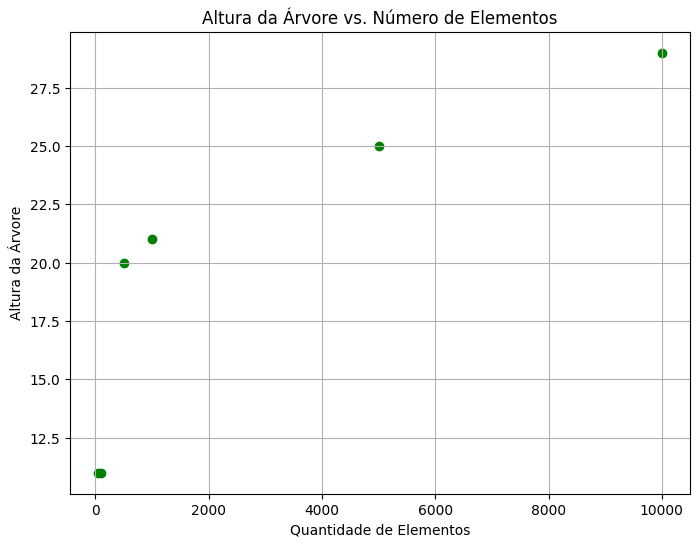

In [ ]:
n_elements = (50, 100, 500, 1000, 5000, 10000)
heights = []

for n in n_elements:
    tree = BinarySearchTree()

    for _ in range(n):
        tree.insert(randint(0, n))
    heights.append(tree.calc_height())

print(heights)

plt.figure(figsize=(8, 6))
plt.scatter(n_elements, heights, color='g', marker='o')

plt.xlabel('Quantidade de Elementos')
plt.ylabel('Altura da Árvore')
plt.title('Altura da Árvore vs. Número de Elementos')
plt.grid(True)

plt.show()

[49, 99, 499, 999, 4999, 9999]


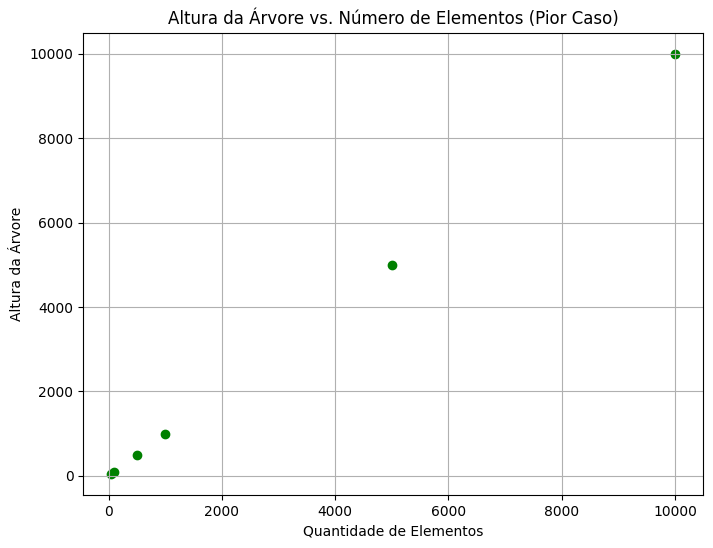

In [ ]:
heights = []

for n in n_elements:
    tree = BinarySearchTree()

    for i in range(n):
        tree.insert(i)
    heights.append(tree.calc_height())

print(heights)

plt.figure(figsize=(8, 6))
plt.scatter(n_elements, heights, color='g', marker='o')

plt.xlabel('Quantidade de Elementos')
plt.ylabel('Altura da Árvore')
plt.title('Altura da Árvore vs. Número de Elementos (Pior Caso)')
plt.grid(True)

plt.show()


c) Adaptação do código para a AVL.

In [ ]:
# Reforço de conceitos:

# - Altura é a distância entre o no mais alto e o no mais baixo
# - Fator de balanceamento é pela diferença entre a altura da
# subarvore a direita e a esquerda

In [ ]:
class AVLTree:
  class Node:
    def __init__(self, value: any, left: 'Node' = None, right: 'Node' = None, height: int = 0) -> None:
      self.value = deepcopy(value)
      self.left = left
      self.right = right
      self.height = height

    def __str__(self):
      return'(' + str(self.value) + ', ' + str(self.left) + ', ' + str(self.right) + ', ' + str(self.height) + ')'

  def __init__(self, extractor: callable = (lambda a: a)) -> None:
    self.__root = None
    self.__extractor = extractor

  def search(self, value: any) -> any:
    return self.__search(self.__root, value)

  def __search(self, node: 'Node', value: any) -> any:
    if not node:
      return None
    if self.__extractor(value) == self.__extractor(node.value):
      return node

    if self.__extractor(value) < self.__extractor(node.value):
      return self.__search(node.left, value)
    else:
      return self.__search(node.right, value)

  def min(self, node: 'Node') -> any:
    while node.left:
        node = node.left
    return node.value

  def max(self, node: 'Node') -> any:
    while node.right:
        node = node.right
    return node.value

  def get_root(self) -> 'Node':
    return deepcopy(self.__root)

  def calc_height(self, node: 'Node') -> int:
    return node.height if node else 0

  def calc_balance_factor(self, node: 'Node') -> int:
    return self.calc_height(node.left) - self.calc_height(node.right) if node else 0

  def rotate_left(self, node: 'Node') -> None:
    right = node.right
    right_left = right.left

    right.left = node
    node.right = right_left

    node.height = 1 + max(self.calc_height(node.left), self.calc_height(node.right))
    right.height = 1 + max(self.calc_height(right.left), self.calc_height(right.right))

    return right

  def rotate_right(self, node: 'Node') -> None:
    left = node.left # 50
    left_right = left.right # 62

    left.right = node # 78
    node.left = left_right #

    node.height = 1 + max(self.calc_height(node.left), self.calc_height(node.right))
    left.height = 1 + max(self.calc_height(left.left), self.calc_height(left.right))

    return left

  def delete(self, value: any) -> None:
    self.__root = self.__delete(self.__root, value)

  def __delete(self, node: 'Node', value: any) -> 'Node':
    if not node:
      return node

    if value > node.value:
      node.right = self.__delete(node.right, value)
    elif value < node.value:
      node.left = self.__delete(node.left, value)
    else:
      if not node.left and not node.right:
        return None
      elif not node.left:
        return node.right
      elif not node.right:
        return node.left
      else:
        node.value = self.max(node.left)
        node.left = self.__delete(node.left, node.value)

    node.height = 1 + max(self.calc_height(node.left), self.calc_height(node.right))

    balance = self.calc_balance_factor(node)

    if balance > 1 and self.calc_balance_factor(node.left) >= 0:
      return self.rotate_right(node)

    if balance < -1 and self.calc_balance_factor(node.right) <= 0:
      return self.rotate_left(node)

    if balance > 1 and self.calc_balance_factor(node.left) < 0:
      node.left = self.rotate_left(node.left)
      return self.rotate_right(node)

    if balance < -1 and self.calc_balance_factor(node.right) > 0:
      node.right = self.rotate_right(node.right)
      return self.rotate_left(node)

    return node

  def insert(self, value: any) -> None:
    self.__root = self.__insert(self.__root, value)

  def __insert(self, node: 'Node', value: any) -> None:
    if not node:
      return self.Node(value)

    if self.__extractor(value) <= self.__extractor(node.value):
      node.left = self.__insert(node.left, value)
    else: node.right = self.__insert(node.right, value)

    node.height = 1 + max(self.calc_height(node.left), self.calc_height(node.right))

    balance = self.calc_balance_factor(node)

    if balance > 1 and self.calc_balance_factor(node.left) >= 0:
      return self.rotate_right(node)

    if balance < -1 and self.calc_balance_factor(node.right) <= 0:
      return self.rotate_left(node)

    if balance > 1 and self.calc_balance_factor(node.left) < 0:
      node.left = self.rotate_left(node.left)
      return self.rotate_right(node)

    if balance < -1 and self.calc_balance_factor(node.right) > 0:
      node.right = self.rotate_right(node.right)
      return self.rotate_left(node)

    return node

  def walk(self) -> None:
    self.__walk(self.__root)
    print()

  def __walk(self, node: 'Node') -> None:
    if not node:
      return
    self.__walk(node.left)
    print(node.value, end=' ')
    self.__walk(node.right)

  def __len__(self) -> int:
    return self.calc_height(self.__root)


In [ ]:
avl_tree = AVLTree()

avl_tree.insert(10)
avl_tree.insert(15)
avl_tree.insert(9)
avl_tree.insert(20)
avl_tree.insert(200)
avl_tree.insert(330)
avl_tree.insert(10)

print('Altura: ', len(avl_tree))

avl_tree.walk()

avl_tree.delete(10)
avl_tree.delete(20)

avl_tree.walk()

print('Altura: ', len(avl_tree))


Altura:  3
9 10 10 15 20 200 330 
9 10 15 200 330 
Altura:  2


[6, 7, 10, 11, 14, 16]


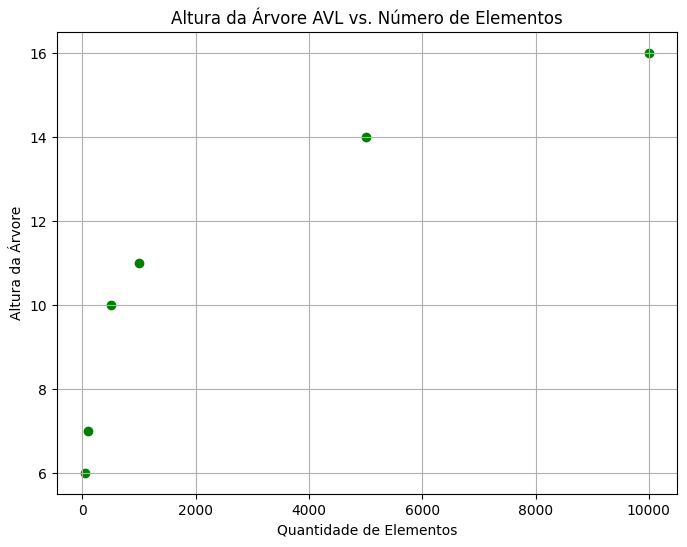

In [ ]:
n_elements = (50, 100, 500, 1000, 5000, 10000)
heights = []

for n in n_elements:
    tree = AVLTree()

    for _ in range(n):
        tree.insert(randint(0, n))
    heights.append(len(tree))

print(heights)

plt.figure(figsize=(8, 6))
plt.scatter(n_elements, heights, color='g', marker='o')

plt.xlabel('Quantidade de Elementos')
plt.ylabel('Altura da Árvore')
plt.title('Altura da Árvore AVL vs. Número de Elementos')
plt.grid(True)

plt.show()

[6, 7, 9, 10, 13, 14]


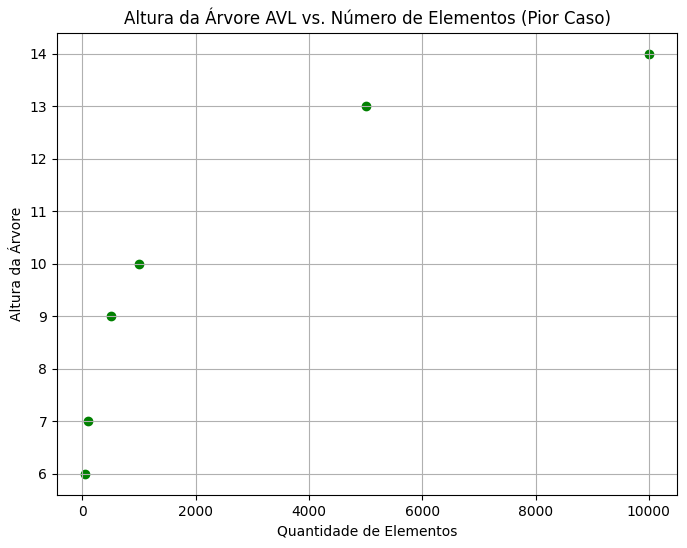

In [ ]:
heights = []

for n in n_elements:
    tree = AVLTree()

    for i in range(n):
        tree.insert(i)
    heights.append(len(tree))

print(heights)

plt.figure(figsize=(8, 6))
plt.scatter(n_elements, heights, color='g', marker='o')

plt.xlabel('Quantidade de Elementos')
plt.ylabel('Altura da Árvore')
plt.title('Altura da Árvore AVL vs. Número de Elementos (Pior Caso)')
plt.grid(True)

plt.show()


In [ ]:
# O bacana é que podemos ver que de fato começa a se formar uma curva logaritmica!